# Autoencoders

## Undercomplete Autoencoders

Eerst gaan we oefenenen op het opstellen van een undercomplete Autoencoders
Deze gaat bijvoorbeeld gebruikt kunnen worden om dimensionality reduction uit te kunnen voeren.
Hiervoor maken we gebruik van de Fashion MNIST dataset die standaard in tensorflow aanwezig is.
De code uit deze notebook is gebaseerd op [de tutorial over autoencoders](https://www.tensorflow.org/tutorials/generative/autoencoder) op de site van tensorflow.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import time
from IPython import display
import PIL
import glob

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
!pip install git+https://github.com/tensorflow/docs

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [13]:
bottleneck_size = 64

encoder = tf.keras.Sequential([
    layers.Flatten(),       # 2d naar 1d
    layers.Dense(bottleneck_size, activation='relu')
])

decoder = tf.keras.Sequential([
    layers.Dense(28*28, activation='sigmoid'),   # sigmoid geeft waarden tussen 0 en 1, onze pixelwaarden zijn tussen 0 en 1, relu kan groter dan 1 gaan, softmax is de som 1 maar moet dus nog geschaald worden achteraf
    layers.Reshape((28, 28))    # 1d naar 2d
])

autoencoder = tf.keras.Sequential([
    encoder,
    decoder
])

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [14]:
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))        # input = output dus twee keer x hier

Epoch 1/10


1875/1875 [==============================] - 3s 1ms/step - loss: 0.0239 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0087 - val_los

In [15]:
encoded_imgs = encoder(x_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

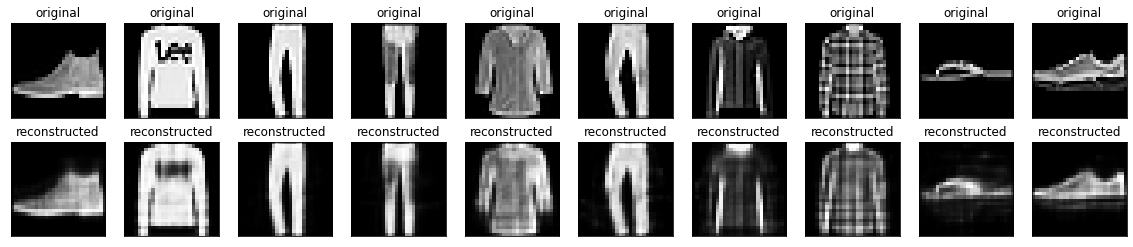

In [16]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Hoeveel dimensies/neuronen heb je nodig in de bottleneck om nog steeds een goed resultaat te krijgen.
Dit kan je bepalen met de elbow-methode waar je het aantal dimensies/neuronen in de bottleneck laat toenemen en wanneer de validation loss te groot wordt/snel begint te stijgen kan je stoppen.
Het aantal dimensies op het punt dat je stopt is dan het aantal dimensies dat je overhoudt.
Doe dit nu voor de voorgaande auto-encoder

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0822 - val_loss: 0.0697
Epoch 2/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.0669 - val_loss: 0.0645
Epoch 3/10
1875/1875 [==============================] - 2s 851us/step - loss: 0.0642 - val_loss: 0.0631
Epoch 4/10
1875/1875 [==============================] - 2s 856us/step - loss: 0.0633 - val_loss: 0.0628
Epoch 5/10
1875/1875 [==============================] - 2s 880us/step - loss: 0.0630 - val_loss: 0.0624
Epoch 6/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.0628 - val_loss: 0.0624
Epoch 7/10
1875/1875 [==============================] - 2s 879us/step - loss: 0.0627 - val_loss: 0.0624
Epoch 8/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.0626 - val_loss: 0.0622
Epoch 9/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.0626 - val_loss: 0.0622
Epoch 10/10
1875/1875 [==============================] - 2s 937us/

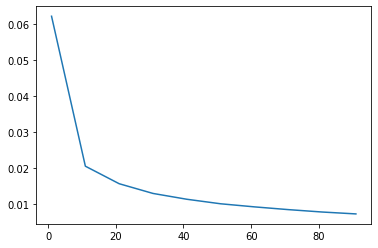

In [17]:
def get_autoencoder(bottleneck_size=1):
        
    encoder = tf.keras.Sequential([
        layers.Flatten(),       # 2d naar 1d
        layers.Dense(bottleneck_size, activation='relu')
    ])

    decoder = tf.keras.Sequential([
        layers.Dense(28*28, activation='sigmoid'),   # sigmoid geeft waarden tussen 0 en 1, onze pixelwaarden zijn tussen 0 en 1, relu kan groter dan 1 gaan, softmax is de som 1 maar moet dus nog geschaald worden achteraf
        layers.Reshape((28, 28))    # 1d naar 2d
    ])

    autoencoder = tf.keras.Sequential([
        encoder,
        decoder
    ])

    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

    return autoencoder

dims = range(1,100,10)
results = []
for dim in dims:
    autoencoder = get_autoencoder(dim)
    history = autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, verbose=0, validation_data=(x_test, x_test))   

    loss=history.history["val_loss"][-1]    # extract the last validation loss
    results.append(loss)
    print(f"Tried {dim} dimensions resulting in a loss of {loss}")

plt.plot(dims, results)

## Denoising autoencoder

In het volgende voorbeeld gaan we een autoencoder opstellen om ruis uit een figuur te gaan verwijderen.
We gebruiken hierbij dezelfde dataset als in het eerste voorbeeld.

Eerst gaan we ruis toevoegen aan de dataset.
Dit kan als volgt

In [20]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

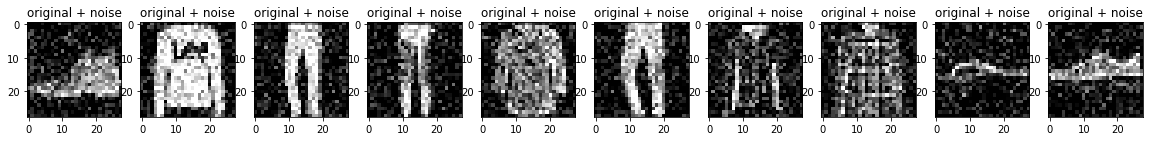

In [21]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

Stel nu een denoising autoencoder op die gebruik maakt van minstens 2 convolutionele lagen.

In [18]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", padding="same", strides =2),
    tf.keras.layers.Conv2D(8, (3, 3), activation="relu", padding="same", strides =2),        # hier neem ik uitzonderlijk iets dat kleiner is omdat we naar een bottleneck willen gaan
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(bottleneck_size)
])

decoder = tf.keras.Sequential([
    #layers.Dense(7*7*8, activation='sigmoid'),   # sigmoid geeft waarden tussen 0 en 1, onze pixelwaarden zijn tussen 0 en 1, relu kan groter dan 1 gaan, softmax is de som 1 maar moet dus nog geschaald worden achteraf
    #layers.Reshape((7, 7, 8))    # 1d naar 2d
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation="relu", padding="same"),   # conv2d transpose is het omgekeerde van conv2d, dat zorgt ervoor dat je niet manueel de conversie moet doen
    # bottleck is nu 7*7*8
    tf.keras.layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation="relu", padding="same"),    # deze lijn geeft een output van 28x28x8
    tf.keras.layers.Conv2D(1, kernel_size=(3,3), activation="sigmoid", padding="same")                  # hier willen we 1 grijswaarde per pixel, dus 1 kernel (bij rgb willen we 3 kernels)
])

autoencoder = tf.keras.Sequential([
    encoder,
    decoder
])

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [22]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0155 - val_loss: 0.0095
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [25]:
encoded_imgs = encoder(x_test_noisy).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

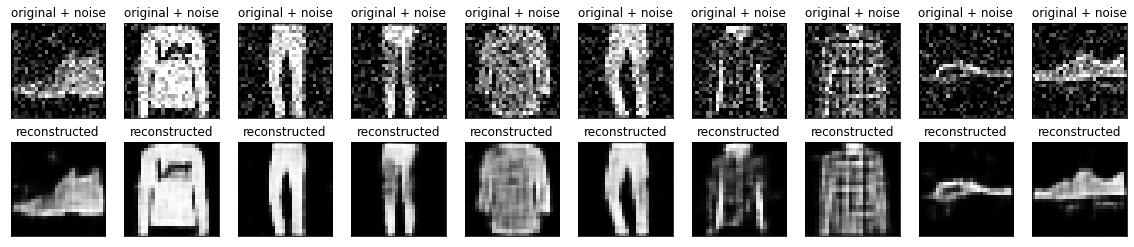

In [26]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Variational autoencoder

De decoder van een auto-encoder kan ook gebruikt worden als generator van beelden.
Als je random waarden gebruikt in de bottleneck, dan kan je beelden genereren die gebaseerd zijn op degene uit de trainingsdata.
Indien je varianten wil maken van een bepaalde input, dan kan je eerst met de encoder de echte bottleneck berekenen en de waarden van de bottleneck dan lichtjes aanpassen.
Dit zie je in onderstaande voorbeeldcode. De code in dit voorbeeld is gebaseerd op [deze guide op tensorflow](https://www.tensorflow.org/tutorials/generative/cvae) en [dit voorbeeld](https://keras.io/examples/generative/vae/#train-the-vae).
Hierbij wordt voor elke dimensie (waarde) van de bottleneck het gemiddelde en de standaardafwijking berekend.
Dit wordt gebruikt om wat variatie toe te voegen op basis van random noise wat ons toelaat om beelden te genereren die lijken op deze uit de trainingsdata.

**Let op:** Bij het opstellen hiervan kan niet eenvoudig gebruik gemaakt worden van een standaard loss functie. Hierdoor moeten we een subklasse maken van een model voor het trainingsproces te bepalen.

In [27]:
# Eigen laag die randomness toevoegt aan de waarde van de latent dimension
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))      # de ruis die toegevoegd wordt voor een variant te maken
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [28]:
latent_dim = 2  # aantal waarden die gebruikt worden (mean en std wordt berekend)

encoder_inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
z_mean = tf.keras.layers.Dense(latent_dim, name="z_mean")(x)            # mean van elke latent dimension
z_log_var = tf.keras.layers.Dense(latent_dim, name="z_log_var")(x)      # std van elke latent dimension
z = Sampling()([z_mean, z_log_var])                                     # mean + ruis van elke latent dimension
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 14, 14, 32)   320         ['input_2[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d_3[0][0]']               
                                                                                                  
 flatten_14 (Flatten)           (None, 3136)         0           ['conv2d_4[0][0]']               
                                                                                            

In [29]:
latent_inputs = tf.keras.Input(shape=(latent_dim,))           # hier geven we de mean/mean met ruis aan om de figuur terug op te bouwen
x = tf.keras.layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = tf.keras.layers.Reshape((7, 7, 64))(x)
x = tf.keras.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = tf.keras.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = tf.keras.layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_29 (Dense)            (None, 3136)              9408      
                                                                 
 reshape_13 (Reshape)        (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 64)       36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 28, 28, 1)        289 

In [30]:
# aangezien het geen standaardtraining is moeten we een eigen model maken met de encoder/decoder
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker =  tf.keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker =  tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        # bereken de loss
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)           # encodeer
            reconstruction = self.decoder(z)                    # decodeer
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)      # bereken loss
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))                    # Kullback-Leibler divergence loss
            total_loss = reconstruction_loss + kl_loss

        # voer gradient descent uit
        grads = tape.gradient(total_loss, self.trainable_weights)                       
        
        # update de gewichten
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))              

        # update de states van de metrics
        self.total_loss_tracker.update_state(total_loss)                                
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [31]:
(x_train, y_train), (x_test, _) = tf.keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
547/547 [==============================] - 49s 87ms/step - loss: 248.9118 - reconstruction_loss: 198.1811 - kl_loss: 3.7158
Epoch 2/30
547/547 [==============================] - 45s 82ms/step - loss: 167.9084 - reconstruction_loss: 161.3674 - kl_loss: 4.8600
Epoch 3/30
547/547 [==============================] - 39s 71ms/step - loss: 162.4275 - reconstruction_loss: 156.3571 - kl_loss: 5.1997
Epoch 4/30
547/547 [==============================] - 46s 84ms/step - loss: 159.7918 - reconstruction_loss: 153.7108 - kl_loss: 5.4085
Epoch 5/30
547/547 [==============================] - 51s 93ms/step - loss: 158.0138 - reconstruction_loss: 152.0530 - kl_loss: 5.5241
Epoch 6/30
547/547 [==============================] - 39s 71ms/step - loss: 156.8321 - reconstruction_loss: 150.8974 - kl_loss: 5.6195
Epoch 7/30
547/547 [==============================] - 41s 75ms/step - loss: 156.0362 - reconstruction_loss: 149.8595 - kl_loss: 5.7125
Epoch 8/30
547/547 [==============================] - 3

In [ ]:
# toon een aantal figuren waar de 2 dimensies varieren van hun minimum naar maximum
def plot_latent_space(vae, n=30, figsize=15):
    # display an n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

In [ ]:
# scatter plot dat aangeeft welke plaatsen leiden tot welke cijfers
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

plot_label_clusters(vae, x_train, y_train)

## GAN

Een tweede manier om beelden te genereren is door gebruik te maken van een GAN of generative adverserial network.
Dit is een interessant concept omdat hierbij twee modellen in parallel getrained worden.
Ten eerste is er de generator of de artiest die leert echte (op basis van de trainingsdata) beelden gemaakt worden.
Deze is in strijd met het tweede model of de discriminator of criticus die leert echte beelden van gegenereerde te onderscheiden.
Tijdens het leerproces wordt de generator steeds beter om echte beelden te maken terwijl de discriminator beter wordt in ze te onderscheiden.
Er wordt een evenwicht bereikt wanneer de discriminator niet meer in staat is om echte en valse beelden te onderscheiden.
De code in het voorbeeld hieronder is gebaseerd op [deze tutorial](https://www.tensorflow.org/tutorials/generative/dcgan) over dcgan.


In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5

BUFFER_SIZE = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
# the generator
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
# the discriminator
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation="sigmoid"))

    return model

discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

In [ ]:
# loss function voor beide modellen
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# learning rate optimizers (apart want je traint de modellen apart)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# training backups in case of interruption
checkpoint_dir = './training_checkpoints'
checkpoint_dir_les = './training_checkpoints_les'
checkpoint_prefix = os.path.join(checkpoint_dir_les, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator, )

In [ ]:
# de training loop
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    # voer gradient descent uit
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        # bereken de output
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        # bereken de loss
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    # hoe moeten de gewichten geupdate worden
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # pas de gewichten aan
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
# toon een set van figuren van het model
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

# de training loop: doe voor elke epoch: train me tde volledige dataset
# toon een aantal beelden om de vooruitgang te kunnen volgen
# toon op het einde ook nog eens het resultaat
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator, epoch + 1, seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  checkpoint.save(file_prefix = checkpoint_prefix)
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, seed)

In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
# restore latest checkpoint
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

# Display a gif for a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
display_image(EPOCHS)

anim_file = 'dcgan.gif'

import imageio
with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

## Latent diffusion (Stable diffusion)

Een latent diffusion model is verwant aan het concept van super-resolution.
Bij superresolution wordt een figuur gedenoised en bekoen we een hogere-resolutieversie van de figuur.
Bij latent diffusion beginnen we met een volledige figuur van ruis. 
Wanneer hierop denoising toegepast wordt, dan hallucineert het model er een bijhorende figuur bij.
Dit proces wordt herhaaldelijk uitgevoerd tot een hele figuur bekomen wordt.

Een heel gekend model die gebruik maakt van latent diffusion is **stable diffusion**. In dit voorbeeld toon ik hoe je dit model kan implementeren aan de hand van tensorflow.
**Let op:** stable diffusion zet tekst om in een figuur. Hierdoor is het complexer dat wat we hier eigenlijk willen maar aangezien we volgende les beginnen met NLP in neurale netwerken is het een voorsmaakje.

In [ ]:
!pip install keras_cv

In [32]:
import keras_cv

Using TensorFlow backend


ValueError: keras_cv>load has already been registered to <function load at 0x000001FEB35945E0>

In [ ]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

images = model.text_to_image("photograph of an astronaut riding a horse", batch_size=3)

def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

In [ ]:
# meer dan korte zinnen kunnen ook
images = model.text_to_image(
    "cute magical flying dog, fantasy art, "
    "golden color, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, mystery, adventure",
    batch_size=3,
)
plot_images(images)

In [ ]:
!pip3 install numpy --pre torch torchvision torchaudio --force-reinstall --index-url https://download.pytorch.org/whl/nightly/cu118

In [ ]:
# make sure you use the pytorch environment (maybe even in miniconda itself if this does not recognize the packages)
# it had to be installed as administrator so also start visual studio code as administrator
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
# enable this if installed for gpu
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]
    
image.save("astronaut_rides_horse.png")